In [251]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl
import datetime as datetime
from dateutil.relativedelta import relativedelta
import os

In [208]:
os.getcwd()

'c:\\repos\\MI\\LSTM'

In [261]:
ser = pd.read_csv('byggd_serbyli.csv', sep=';', index_col=0)        #yearly data
fjol = pd.read_csv('byggd_fjolbyli.csv', sep=';', index_col=0)      #yearly data
stada = pd.read_csv('stada_rvk.csv', index_col=0).T                   #yearly data
byggt = pd.read_csv('byggdar_ibudir.csv', sep=';',header=None)      #yearly data
mann = pd.read_csv('mannfjoldi_sveita.csv',index_col=0).T          #yearly data
variables_1 = pd.read_csv('merged_variables.csv',index_col=0)         #monthly data
df = pd.read_csv('kaupskra_juni.csv', sep=';',usecols=('utgdag', 'sveitarfelag', 'kaupverd',
       'fasteignamat', 'byggar', 'einflm', 'lod_flm',
       'tegund', 'fullbuid', 'onothaefur_samningur'))                     #daily data

In [262]:
df.head()

,sveitarfelag,utgdag,kaupverd,fasteignamat,byggar,einflm,lod_flm,tegund,fullbuid,onothaefur_samningur
0,Kópavogsbær,2012-07-30 00:00:00,87000.0,"70850,0",1985,"780,4","1105,0",Atvinnuhusnaedi,1.0,0.0
1,Hafnarfjarðarkaupstaður,2011-02-28 00:00:00,36000.0,"40790,0",1983,"400,0","3000,0",Atvinnuhusnaedi,1.0,0.0
2,Reykjavíkurborg,2012-04-16 00:00:00,31000.0,"4679,0",1962,"310,2","565,0",Atvinnuhusnaedi,1.0,1.0
3,Reykjavíkurborg,2012-04-16 00:00:00,31000.0,"5516,0",1962,"310,2","565,0",Atvinnuhusnaedi,1.0,1.0
4,Reykjavíkurborg,2018-02-20 00:00:00,23500.0,"13200,0",1962,"71,4","565,0",Atvinnuhusnaedi,1.0,0.0


In [263]:
df['utgdag'] = df['utgdag'].str[:-4]
df['utgdag'] = pd.to_datetime(df['utgdag'])
df.head()

,sveitarfelag,utgdag,kaupverd,fasteignamat,byggar,einflm,lod_flm,tegund,fullbuid,onothaefur_samningur
0,Kópavogsbær,2012-07-30,87000.0,"70850,0",1985,"780,4","1105,0",Atvinnuhusnaedi,1.0,0.0
1,Hafnarfjarðarkaupstaður,2011-02-28,36000.0,"40790,0",1983,"400,0","3000,0",Atvinnuhusnaedi,1.0,0.0
2,Reykjavíkurborg,2012-04-16,31000.0,"4679,0",1962,"310,2","565,0",Atvinnuhusnaedi,1.0,1.0
3,Reykjavíkurborg,2012-04-16,31000.0,"5516,0",1962,"310,2","565,0",Atvinnuhusnaedi,1.0,1.0
4,Reykjavíkurborg,2018-02-20,23500.0,"13200,0",1962,"71,4","565,0",Atvinnuhusnaedi,1.0,0.0


In [210]:
mann.drop('Seltjarnarnes', axis=1,inplace=True)
mann.index = pd.to_datetime(mann.index, format='%Y')
stada.index = pd.to_datetime(stada.index, format='%Y')

In [211]:
samtals = ser[1:]+fjol[1:]
samtals.columns = mann.columns
samtals.index = pd.to_datetime(samtals.index, format='%Y')

In [212]:
ser = ser[1:]
fjol = fjol[1:]
ser.columns = mann.columns + '_serbyli'
fjol.columns = mann.columns + '_fjolbyli'

In [213]:
byggingar = merge = pd.merge(ser, fjol, how='outer', left_index=True, right_index=True)
byggingar.index = pd.to_datetime(byggingar.index, format='%Y')
byggingar.head()

,Reykjavík_serbyli,Kópavogur_serbyli,Garðabær_serbyli,Hafnarfjörður_serbyli,Mosfellsbær_serbyli,Reykjavík_fjolbyli,Kópavogur_fjolbyli,Garðabær_fjolbyli,Hafnarfjörður_fjolbyli,Mosfellsbær_fjolbyli
Ár,,,,,,,,,,
2006-01-01,9644,3249,2659,2821,1547,39394,7956,1744,5853,970
2007-01-01,9820,3404,2790,3016,1669,40146,8142,1912,6594,1059
2008-01-01,10017,3541,2922,3064,1901,40542,8336,1991,6803,1150
2009-01-01,10021,3558,2927,3067,1912,40669,8347,1989,6806,1155
2010-01-01,10041,3575,2936,3068,1916,40692,8491,1990,6832,1185


In [214]:
samtals.index = pd.to_datetime(samtals.index, format='%Y')
samtals

,Reykjavík,Kópavogur,Garðabær,Hafnarfjörður,Mosfellsbær
Ár,,,,,
2006-01-01,49038,11205,4403,8674,2517
2007-01-01,49966,11546,4702,9610,2728
2008-01-01,50559,11877,4913,9867,3051
2009-01-01,50690,11905,4916,9873,3067
2010-01-01,50733,12066,4926,9900,3101
2011-01-01,50779,12088,4933,9900,3104
2012-01-01,51021,12227,5020,9910,3102
2013-01-01,51080,12547,5057,10043,3098
2014-01-01,51265,12775,5189,10023,3112


In [215]:
ibud_per = samtals / mann

In [216]:
merge = pd.merge(ibud_per, stada, how='outer', left_index=True, right_index=True)

In [217]:
variables_1.head()

,date,overdtryggt,verdtryggt,visitala_rvk_%,verdbolga_%
0,2006-01-01,12.5,4.15,0.5,-0.259179
1,2006-02-01,12.5,4.15,2.0,-0.259179
2,2006-03-01,12.5,4.15,1.7,1.169337
3,2006-04-01,12.5,4.30,1.2,1.070205
4,2006-05-01,13.0,4.60,-0.2,1.482423


In [218]:
merge.ffill(inplace=True)
merge.reset_index(inplace=True)
merge.rename(columns={'index':'date'}, inplace=True)
merge.head()


,date,Reykjavík,Kópavogur,Garðabær,Hafnarfjörður,Mosfellsbær,"Eigendur, skuldlaust",Eigendur m. lán,"Leigjendur, alls"
0,2006-01-01,0.426536,0.422639,0.466222,0.385545,0.351291,18.0,64.8,17.2
1,2007-01-01,0.428371,0.419473,0.492047,0.404615,0.362959,14.1,69.0,16.9
2,2008-01-01,0.425484,0.411182,0.492186,0.394112,0.372437,13.4,67.7,18.9
3,2009-01-01,0.424017,0.397151,0.474609,0.381934,0.364989,15.3,64.0,20.8
4,2010-01-01,0.428756,0.397470,0.462839,0.382048,0.362563,14.9,60.3,24.8


In [223]:
variables_1['date'] = pd.to_datetime(variables_1['date'])

In [226]:
all_variables = pd.merge(merge, variables_1, how='outer', on='date')
all_variables.sort_values('date', ascending=True, inplace=True)

In [239]:
allt = all_variables.set_index('date').interpolate()

<AxesSubplot:xlabel='date'>

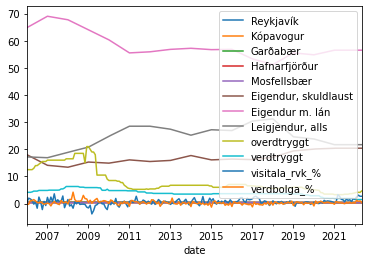

In [248]:
allt.plot()

In [249]:
allt.to_csv('independent_variables_LSTM.csv')